In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
#from ISLP import load_data
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split

In [7]:
import os, sys
root = os.getcwd()

E:\01_Programming\Py\pythonProject\Stat_Mo


In [8]:
study = pd.read_csv(f"{root}\Dataset\Studi-Fragebogen_V2.csv")
study.head()

,Timestamp,Wie alt bist du?,Als welches Geschlecht identifiziert du dich?,Welche Studienart verfolgst du?,Welcher Fakultät gehörst du an?,In welchem Studienabschnitt befindest du dich?,In welchem Semester bist du?,Welche Abschlüsse hast du bereits?,Hast du vorher schon etwas anderes studiert?,"Fortsetzung zur Frage oben: Wenn nicht erster Studiengang, wie oft hast du schon studiert?",...,Wie schätzt du dein allgemeines Fitnessniveau in Bezug auf Kraft im Vergleich zu anderen Studenten deines Geschlechts ein?,An wie vielen Tagen machst du Kraftsport in der Woche?,"Wie viele Stunden machst du Kraftsport in der Woche? (in Zahlen und nur halbe oder ganze Stunden, Bsp.: 4,5)",An wie vielen Tagen gehst du Laufen in der Woche?,"Wie viele Stunden gehst du Laufen in der Woche? (in Zahlen und nur halbe oder ganze Stunden, Bsp.: 4,5)",An wie vielen Tagen betreibst du Ballsport in der Woche?,"Wie viele Stunden betreibst du Ballsport in der Woche? (in Zahlen und nur halbe oder ganze Stunden, Bsp.: 4,5)",An wie vielen Tagen machst du sonstigen Sport in der Woche?,"Wie viele Stunden sonstigen Sport machst du in der Woche? (in Zahlen und nur halbe oder ganze Stunden, Bsp.: 4,5)",Welchen sonstigen Sport machst du?
0,2024/04/30 9:31:18 AM GMT+3,21,männlich,Dual,Wirtschaftsingenieurwesen,Bachelor,2.0,Abitur,Nein,NaN,...,5,4,8,0.0,NaN,2.0,6,1.0,1,Volleyball in der Freizeit
1,2024/04/30 9:32:00 AM GMT+3,37,weiblich,Vollzeit,Wirtschaftsingenieurwesen,NaN,NaN,Abitur;höher,Ja,2,...,2,1,"0,5",1.0,"0,5",1.0,"1,5",1.0,1,Yoga
2,2024/04/30 9:32:33 AM GMT+3,22,weiblich,Vollzeit,Wirtschaftsingenieurwesen,Bachelor,2.0,Mittlerer Schulabschluss;Mittlere Reife;Fachab...,Ja,2,...,4,3,4,3.0,"0,5",0.0,0,0.0,NaN,NaN
3,2024/04/30 9:34:37 AM GMT+3,23,männlich,Vollzeit,Wirtschaftsingenieurwesen,Bachelor,2.0,Mittlerer Schulabschluss;Mittlere Reife;Fachab...,Nein,NaN,...,4,5,"11,5",0.0,0,0.0,0,0.0,0,Keinen
4,2024/04/30 10:01:04 AM GMT+3,22,männlich,Vollzeit,Informatik,Bachelor,2.0,Mittlere Reife;Abgeschlossene Berufsausbildung...,Nein,NaN,...,3,0,0,0.0,0,0.0,0,0.0,0,NaN


In [9]:
# Assuming 'df' is your DataFrame
study.columns = [
    'timestamp',
    # Demographics
    'age',
    'gender_identity',
    # Academic Information
    'study_type',
    'faculty',
    'study_section',
    'semester',
    'degrees_obtained',
    'previously_studied',
    'previous_studies_count',
    # Work Information
    'funding_source',
    'work_hours_weekly',
    'monthly_income',
    'work_impact_on_studies',
    'satisfaction_work_study_balance',
    'work_benefits_home_office',
    'work_benefits_flexible_hours',
    'work_benefits_cafeteria',
    'work_benefits_holiday_bonus',
    'work_benefits_fruit_basket',
    'work_benefits_free_drinks',
    'work_benefits_pension',
    'work_benefits_training_coverage',
    'work_benefits_other_subsidies',
    'work_benefits_paid_travel',
    'work_benefits_employee_discount',
    'work_life_balance',
    # Academic Engagement
    'social_contacts_in_study',
    'lecture_hours_weekly',
    'self_study_hours_weekly',
    'satisfaction_with_results',
    'academic_content_learning',
    'academic_structure_lectures',
    'academic_availability_office_hours',
    'academic_activity_options',
    'academic_resources_environment',
    'academic_schedule',
    'academic_career_orientation',
    # Fitness and Sports
    'sport_importance',
    'sport_role',
    'sport_expenses_monthly',
    'sport_motivation_factors',
    'sport_obstacles',
    'fitness_level_endurance',
    'fitness_level_strength',
    'strength_days_weekly',
    'strength_hours_weekly',
    'running_days_weekly',
    'running_hours_weekly',
    'ball_sport_days_weekly',
    'ball_sport_hours_weekly',
    'other_sport_days_weekly',
    'other_sport_hours_weekly',
    'other_sport_type'
]

In [10]:
## sorted cols according to topics
general = ['age', 'gender_identity']

aca_infor = ['study_type',
             'faculty',
             'study_section',
             'semester',
             'degrees_obtained',
             'previously_studied',
             'previous_studies_count',]

work = [
    'funding_source',
    'work_hours_weekly',
    'monthly_income',
    'work_impact_on_studies',
    'satisfaction_work_study_balance',
    'work_benefits_home_office',
    'work_benefits_flexible_hours',
    'work_benefits_cafeteria',
    'work_benefits_holiday_bonus',
    'work_benefits_fruit_basket',
    'work_benefits_free_drinks',
    'work_benefits_pension',
    'work_benefits_training_coverage',
    'work_benefits_other_subsidies',
    'work_benefits_paid_travel',
    'work_benefits_employee_discount',
    'work_life_balance',]

aca_engage = [
    'social_contacts_in_study',
    'lecture_hours_weekly',
    'self_study_hours_weekly',
    'satisfaction_with_results',
    'academic_content_learning',
    'academic_structure_lectures',
    'academic_availability_office_hours',
    'academic_activity_options',
    'academic_resources_environment',
    'academic_schedule',
    'academic_career_orientation',
]

fitness = [
    'sport_importance',
    'sport_role',
    'sport_expenses_monthly',
    'sport_motivation_factors',
    'sport_obstacles',
    'fitness_level_endurance',
    'fitness_level_strength',
    'strength_days_weekly',
    'strength_hours_weekly',
    'running_days_weekly',
    'running_hours_weekly',
    'ball_sport_days_weekly',
    'ball_sport_hours_weekly',
    'other_sport_days_weekly',
    'other_sport_hours_weekly',
    'other_sport_type'
]

### Übung 1:

In dieser Übung wird untersucht, welche Prädiktoren sich stark auf Work-Study-Balance beeinflussen können. in der ersten Iteration werden nicht alle angegebenen Parameters in der Fragebogen verwendet.

Wenn einer Wert eines Datenpunktes fehlt, wird die ganze Zeile in der Modllierung nicht berücksichtigt (dropped as na)

In [11]:
ubung_1 = pd.concat([study[general],
                      study[[
             'study_type',
             'faculty',
             'study_section',
             'degrees_obtained',
             'previously_studied',
             'funding_source',
             'work_hours_weekly',
             'monthly_income',
             'work_impact_on_studies',
             'satisfaction_work_study_balance',
             ]]], axis = 1)

print(f"dataframe shape: {ubung_1.shape}")
print(" ")
ubung_1.head()

dataframe shape: (35, 12)
 


,age,gender_identity,study_type,faculty,study_section,degrees_obtained,previously_studied,funding_source,work_hours_weekly,monthly_income,work_impact_on_studies,satisfaction_work_study_balance
0,21,männlich,Dual,Wirtschaftsingenieurwesen,Bachelor,Abitur,Nein,Duali,wenn ich arbeite (also in den Semesterferien) ...,1.101 - 1.400€,Nein,4.0
1,37,weiblich,Vollzeit,Wirtschaftsingenieurwesen,NaN,Abitur;höher,Ja,Werkstudentenstelle;Stipendium;Eltern/Familie,8,kleiner gleich 520€,Nein,2.0
2,22,weiblich,Vollzeit,Wirtschaftsingenieurwesen,Bachelor,Mittlerer Schulabschluss;Mittlere Reife;Fachab...,Ja,Werkstudentenstelle;Eltern/Familie,20,1.401 - 1.700€,Ja,2.0
3,23,männlich,Vollzeit,Wirtschaftsingenieurwesen,Bachelor,Mittlerer Schulabschluss;Mittlere Reife;Fachab...,Nein,Eltern/Familie;Vorher Ausbildung und somit ang...,0,kein Einkommen,Nein,NaN
4,22,männlich,Vollzeit,Informatik,Bachelor,Mittlere Reife;Abgeschlossene Berufsausbildung...,Nein,Erspartes hab vorher eine Ausbildung gemacht u...,0,kein Einkommen,NaN,NaN


In [12]:
ubung_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              35 non-null     int64  
 1   gender_identity                  35 non-null     object 
 2   study_type                       35 non-null     object 
 3   faculty                          35 non-null     object 
 4   study_section                    34 non-null     object 
 5   degrees_obtained                 35 non-null     object 
 6   previously_studied               35 non-null     object 
 7   funding_source                   35 non-null     object 
 8   work_hours_weekly                27 non-null     object 
 9   monthly_income                   35 non-null     object 
 10  work_impact_on_studies           28 non-null     object 
 11  satisfaction_work_study_balance  26 non-null     float64
dtypes: float64(1), int64(1),

In [13]:
ubung_1.isna().sum()

age                                0
gender_identity                    0
study_type                         0
faculty                            0
study_section                      1
degrees_obtained                   0
previously_studied                 0
funding_source                     0
work_hours_weekly                  8
monthly_income                     0
work_impact_on_studies             7
satisfaction_work_study_balance    9
dtype: int64

In [14]:
df_1 = ubung_1.dropna()
df_1.shape

(23, 12)

##### EDA & Data Preprocessing

```
Features                              Action
---------------                  ----------------

age                              : nothing

gender_identity                  : changed to man,woman -> hot encode

study_type                       : drop features due to low quantity

faculty                          : no change -> hot encode

study_section                    : drop, due to

degrees_obtained                 : pick last selection then use ordinal encoding

previously_studied               : One Hot Encoding

funding_source                   : count the amount of source listed in the survey, total would be the predictor's value

work_hours_weekly                :

monthly_income                   : ordinal encode, maybe check for gender paygap

work_impact_on_studies           : imputation of yes/no values

satisfaction_work_study_balance  (TARGET) : nothing - split input output
```

###### **work impact to studies** - `work_impact_on_studies`

In [16]:
df_1["work_impact_on_studies"].value_counts()

work_impact_on_studies
5       7
4       5
2       3
1       3
3       3
Nein    1
Ja      1
Name: count, dtype: int64

In [17]:
idx_nein = df_1.query("work_impact_on_studies=='Nein'").index
df_1.loc[idx_nein,"work_impact_on_studies"] = 0
df_1.loc[idx_nein]

,age,gender_identity,study_type,faculty,study_section,degrees_obtained,previously_studied,funding_source,work_hours_weekly,monthly_income,work_impact_on_studies,satisfaction_work_study_balance
0,21,männlich,Dual,Wirtschaftsingenieurwesen,Bachelor,Abitur,Nein,Duali,wenn ich arbeite (also in den Semesterferien) ...,1.101 - 1.400€,0,4.0


In [18]:
idx_ja = df_1.query("work_impact_on_studies=='Ja'").index
df_1.loc[idx_ja,"work_impact_on_studies"] = np.nan
df_1.loc[idx_ja]

,age,gender_identity,study_type,faculty,study_section,degrees_obtained,previously_studied,funding_source,work_hours_weekly,monthly_income,work_impact_on_studies,satisfaction_work_study_balance
2,22,weiblich,Vollzeit,Wirtschaftsingenieurwesen,Bachelor,Mittlerer Schulabschluss;Mittlere Reife;Fachab...,Ja,Werkstudentenstelle;Eltern/Familie,20,1.401 - 1.700€,NaN,2.0


In [19]:
df_1.loc[idx_ja, "work_impact_on_studies"] = df_1["work_impact_on_studies"].median()
df_1["work_impact_on_studies"].value_counts()

work_impact_on_studies
5      7
4      5
2      3
1      3
3      3
0      1
4.0    1
Name: count, dtype: int64

In [20]:
df_1["work_impact_on_studies"] = df_1["work_impact_on_studies"].astype(int)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              23 non-null     int64  
 1   gender_identity                  23 non-null     object 
 2   study_type                       23 non-null     object 
 3   faculty                          23 non-null     object 
 4   study_section                    23 non-null     object 
 5   degrees_obtained                 23 non-null     object 
 6   previously_studied               23 non-null     object 
 7   funding_source                   23 non-null     object 
 8   work_hours_weekly                23 non-null     object 
 9   monthly_income                   23 non-null     object 
 10  work_impact_on_studies           23 non-null     int32  
 11  satisfaction_work_study_balance  23 non-null     float64
dtypes: float64(1), int32(1), int6

C:\Users\Andreas Aditya\AppData\Local\Temp\ipykernel_32900\2690689150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["work_impact_on_studies"] = df_1["work_impact_on_studies"].astype(int)


In [21]:
df_1["work_impact_on_studies"].value_counts()

work_impact_on_studies
5    7
4    6
2    3
1    3
3    3
0    1
Name: count, dtype: int64

###### **Einkommen** - `monthly_income`

In [22]:
df_1.loc[:,'monthly_income'].value_counts()

monthly_income
851 - 1.100€           8
1.101 - 1.400€         4
kleiner gleich 520€    4
kein Einkommen         2
2000 - 2500€           2
1.401 - 1.700€         1
größer 3000€           1
521 - 850€             1
Name: count, dtype: int64

In [23]:
sorted_order = {'kein Einkommen':'1_keine',
                'kleiner gleich 520€':'2_<=520',
                '521 - 850€':'3_<=850',
                '851 - 1.100€':'4_<=1.100€',
                '1.101 - 1.400€':'5_<=1.400€',
                '1.401 - 1.700€':'6_<=1.700€',
                '2000 - 2500€':'7_<=2500€',
                'größer 3000€':'8_>3000€'}

df_1.loc[:, "monthly_income"] = df_1.loc[:, "monthly_income"].map(sorted_order)

In [24]:
sorted_income = df_1.loc[:,'monthly_income'].value_counts().sort_index()
sorted_income

monthly_income
1_keine       2
2_<=520       4
3_<=850       1
4_<=1.100€    8
5_<=1.400€    4
6_<=1.700€    1
7_<=2500€     2
8_>3000€      1
Name: count, dtype: int64

Text(0, 0.5, 'Counts')

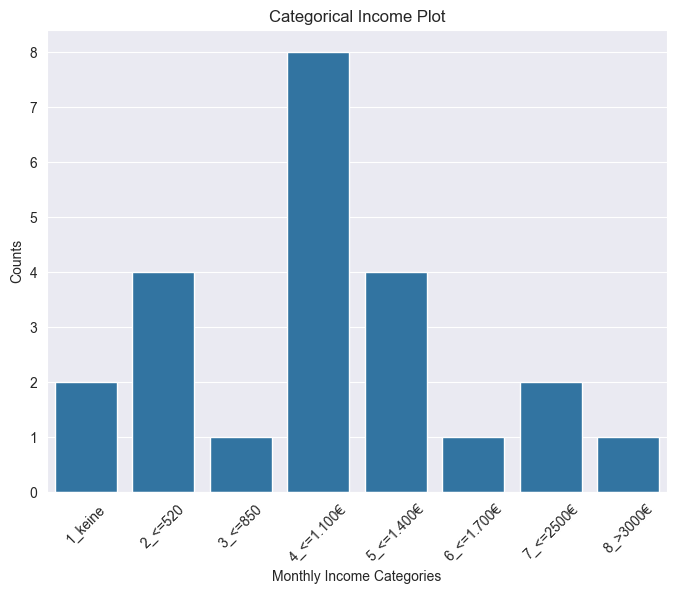

In [26]:
# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=sorted_income).set_title("Categorical Income Plot")

# complete axis and labeling
plt.xticks(rotation=45)
plt.xlabel('Monthly Income Categories')
plt.ylabel('Counts')

In [27]:
## scalled ordinal categorical
mapping_income = [0,520,850,1100,1400,1700,2500,3000]
ord_encode = [] ; max_range = max(mapping_income)
for income_range in mapping_income:
  temp = (income_range / max_range) * 10
  ord_encode.append(round(temp,2))

ord_encode

[0.0, 1.73, 2.83, 3.67, 4.67, 5.67, 8.33, 10.0]

In [28]:
## map income with ordinal encoding
original_cat = np.sort(df_1["monthly_income"].unique())
encode_map = {}
for i in range(len(original_cat)):
  encode_map[original_cat[i]] = ord_encode[i]

print(encode_map)

{'1_keine': 0.0, '2_<=520': 1.73, '3_<=850': 2.83, '4_<=1.100€': 3.67, '5_<=1.400€': 4.67, '6_<=1.700€': 5.67, '7_<=2500€': 8.33, '8_>3000€': 10.0}


In [29]:
df_1.loc[:, "monthly_income"] = df_1.loc[:, "monthly_income"].map(encode_map)
df_1["monthly_income"].value_counts()

monthly_income
3.67    8
4.67    4
1.73    4
0.0     2
8.33    2
5.67    1
10.0    1
2.83    1
Name: count, dtype: int64

###### **Gender - `gender_identity`**

In [30]:
df_1.gender_identity.value_counts()

gender_identity
männlich                   14
weiblich                    8
Apace Kampfhubschrauber     1
Name: count, dtype: int64

In [31]:
gender_map = {"männlich":"man",
              "weiblich":"woman"}

df_1.loc[:, "gender_identity"] = df_1.loc[:, "gender_identity"].map(gender_map).fillna("unkown")
df_1.gender_identity.value_counts()

gender_identity
man       14
woman      8
unkown     1
Name: count, dtype: int64

Text(0.5, 0, '')

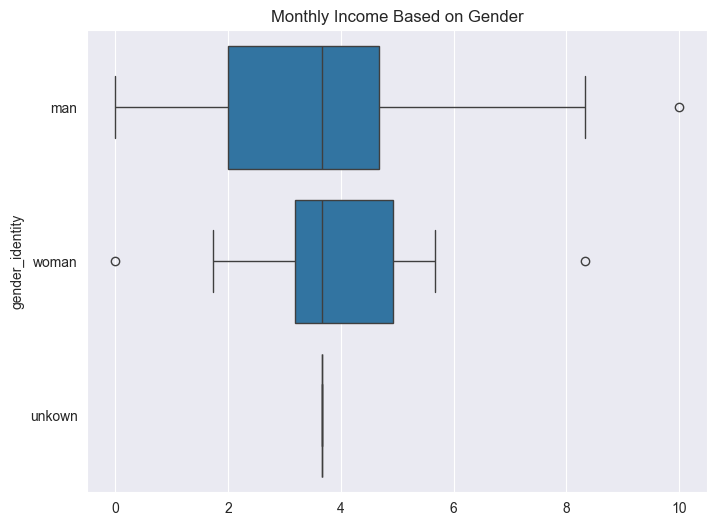

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x="monthly_income", y="gender_identity", data=df_1).set_title("Monthly Income Based on Gender")
plt.xlabel("")

**conclusion:** Fortschritte in Gender-Paygap ist real !

In [33]:
df_1.groupby("study_type")["monthly_income"].describe()

,count,unique,top,freq
study_type,,,,
Berufsbegleitend,2.0,2.0,10.00,1.0
Dual,2.0,2.0,4.67,1.0
Vollzeit,19.0,7.0,3.67,7.0


###### **Studienart - `study_type`**

In [34]:
abschluss_map = {"Vollzeit":"Fulltime",
                 "Dual":"Dualstudy",
                 "Berufsbegleitend":"part-time"}

df_1["study_type"] = df_1["study_type"].map(abschluss_map)
df_1["study_type"].value_counts()

C:\Users\Andreas Aditya\AppData\Local\Temp\ipykernel_32900\249254534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["study_type"] = df_1["study_type"].map(abschluss_map)


study_type
Fulltime     19
Dualstudy     2
part-time     2
Name: count, dtype: int64

###### **Angestrebter Abschluss** - `study_section`

In [35]:
df_1.study_section.value_counts()

study_section
Bachelor    22
Master       1
Name: count, dtype: int64

diese Splate kann auch entfernt werden, weil zu wenig Datenpunkt für Masterstudium ist

###### **Highest Education** - `degrees_obtained`

In [36]:
df_1.degrees_obtained.value_counts()

degrees_obtained
Abitur                                                       7
Fachabitur                                                   6
Mittlere Reife;Abgeschlossene Berufsausbildung;Fachabitur    2
Mittlerer Schulabschluss;Mittlere Reife;Fachabitur           1
Mittlere Reife;Abgeschlossene Berufsausbildung;Abitur        1
Bachelor;Master                                              1
Abgeschlossene Berufsausbildung;Abitur                       1
Bachelor                                                     1
Abitur;Bachelor                                              1
Mittlere Reife;Abgeschlossene Berufsausbildung;Meister       1
Mittlerer Schulabschluss;Mittlere Reife                      1
Name: count, dtype: int64

In [37]:
df_1["degrees_obtained"] = df_1["degrees_obtained"].str.split(";").str[-1]

C:\Users\Andreas Aditya\AppData\Local\Temp\ipykernel_32900\2867164607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["degrees_obtained"] = df_1["degrees_obtained"].str.split(";").str[-1]


In [38]:
df_1["degrees_obtained"].value_counts(dropna=False)

degrees_obtained
Abitur            9
Fachabitur        9
Bachelor          2
Master            1
Meister           1
Mittlere Reife    1
Name: count, dtype: int64

In [39]:
map_education = {
    "Mittlerer Schulabschluss": 0,
    "Mittlere Reife": 1,
    "Abgeschlossene Berufsausbildung": 2,
    "Fachabitur": 3,
    "Abitur": 4,
    "Meister": 5,
    "Bachelor": 6,
    "Master": 7,
    "höher": 8
}

df_1["degrees_obtained"] = df_1["degrees_obtained"].map(map_education)
df_1["degrees_obtained"].value_counts()

C:\Users\Andreas Aditya\AppData\Local\Temp\ipykernel_32900\1652542424.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["degrees_obtained"] = df_1["degrees_obtained"].map(map_education)


degrees_obtained
4    9
3    9
6    2
7    1
5    1
1    1
Name: count, dtype: int64

Text(0.5, 1.0, "Relationship of One's degree and work study balance")

<Figure size 800x600 with 0 Axes>

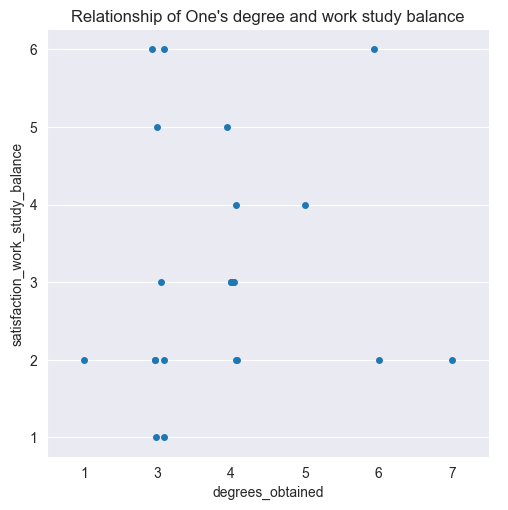

In [40]:
plt.figure(figsize=(8,6))
sns.catplot(data=df_1, x="degrees_obtained", y="satisfaction_work_study_balance")
plt.title("Relationship of One's degree and work study balance")

<Figure size 800x600 with 0 Axes>

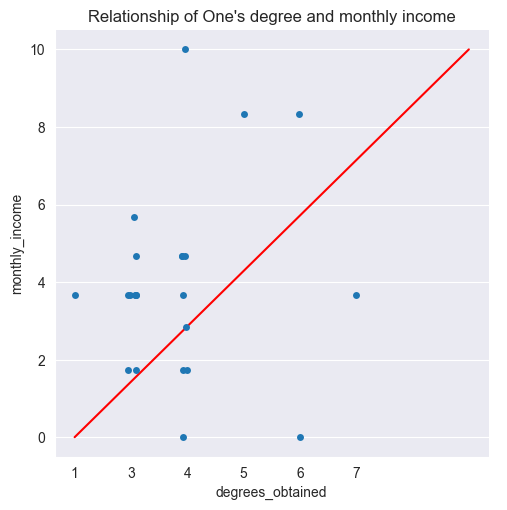

In [41]:
plt.figure(figsize=(8,6))
sns.catplot(data=df_1, x="degrees_obtained", y="monthly_income")
plt.title("Relationship of One's degree and monthly income")
plt.plot([0,7], [0,10], c="red")

###### **Study history** - `previously_studied`

In [42]:
df_1["previously_studied"].value_counts()

previously_studied
Nein    13
Ja      10
Name: count, dtype: int64

one hot encoding

###### **income source** - `funding_source`

In [43]:
df_1["funding_source"].value_counts()

funding_source
Werkstudentenstelle;Eltern/Familie                   3
Teilzeit                                             3
Werkstudentenstelle                                  3
Duali                                                2
Selbstständig                                        2
Eltern/Familie                                       2
Werkstudentenstelle;Selbstständig                    2
Mini/Midijob;Eltern/Familie                          2
Mini/Midijob                                         1
Teilzeit;Eltern/Familie                              1
Werkstudentenstelle;Mini/Midijob                     1
Werkstudentenstelle;Eltern/Familie;Kapitalerträge    1
Name: count, dtype: int64

wir könen so annehmen, dass jede Einkommensquelle als eigenständige Einheit existiert unabhängig dem finanziellen Ertrag, der die Quelle generieren kann.
deswegen werden wir sie als ordinale Kategorie einstufen, gedanke dahinter je mehr Einkunftsquelle, desto mehr Geld

In [44]:
df_1["funding_source"] = df_1["funding_source"].str.split(";").apply(len)
df_1["funding_source"].head()

C:\Users\Andreas Aditya\AppData\Local\Temp\ipykernel_32900\1455644631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["funding_source"] = df_1["funding_source"].str.split(";").apply(len)


0    1
2    2
7    1
8    1
9    2
Name: funding_source, dtype: int64

Text(0.5, 1.0, 'Relationship of fuding source and monthly income')

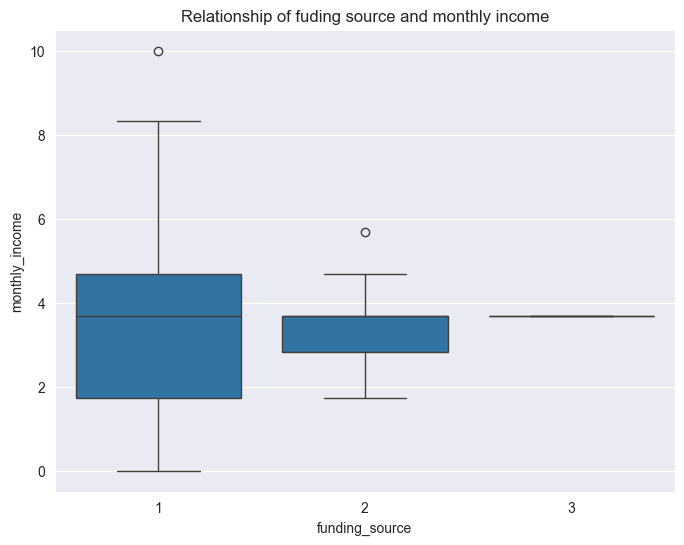

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_1, x="funding_source", y="monthly_income")
plt.title("Relationship of fuding source and monthly income")

###### **Work hours** - `work_hours_weekly`

In [46]:
df_1["work_hours_weekly"].value_counts()

work_hours_weekly
20                                                         9
10                                                         2
18                                                         2
15                                                         2
wenn ich arbeite (also in den Semesterferien) dann 35 h    1
40                                                         1
0                                                          1
5                                                          1
16                                                         1
30                                                         1
6                                                          1
14                                                         1
Name: count, dtype: int64

In [47]:
arb_std_idx = df_1.query("work_hours_weekly =='wenn ich arbeite (also in den Semesterferien) dann 35 h'").index

In [48]:
df_1.loc[arb_std_idx, "work_hours_weekly"] = 20

In [49]:
df_1["work_hours_weekly"].value_counts()

work_hours_weekly
20    9
10    2
18    2
15    2
20    1
40    1
0     1
5     1
16    1
30    1
6     1
14    1
Name: count, dtype: int64

In [50]:
df_1['work_hours_weekly'] = df_1['work_hours_weekly'].astype(int)

C:\Users\Andreas Aditya\AppData\Local\Temp\ipykernel_32900\3424509149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['work_hours_weekly'] = df_1['work_hours_weekly'].astype(int)


In [51]:
sorted_arb_std = df_1['work_hours_weekly'].value_counts().sort_index()
sorted_arb_std

work_hours_weekly
0      1
5      1
6      1
10     2
14     1
15     2
16     1
18     2
20    10
30     1
40     1
Name: count, dtype: int64

Text(0.5, 1.0, 'Relationship of working hours and monthly income')

<Figure size 800x600 with 0 Axes>

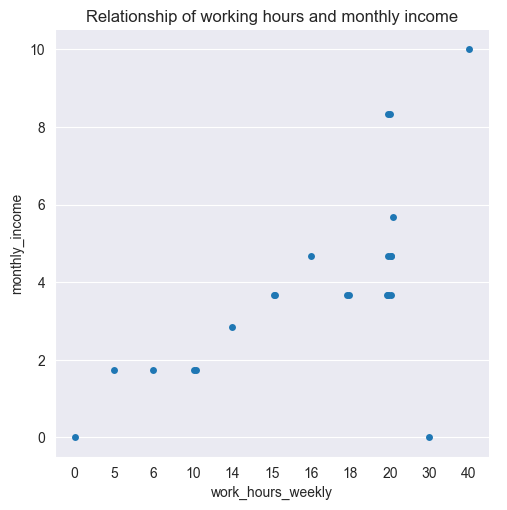

In [52]:
plt.figure(figsize=(8,6))
sns.catplot(data=df_1, x="work_hours_weekly", y="monthly_income")
plt.title("Relationship of working hours and monthly income")

###### **Fakultät - `faculty`**

In [53]:
df_1.faculty.value_counts()

faculty
Wirtschaftsingenieurwesen          18
Business School                     3
Elektro und Informationstechnik     1
Maschinenbau                        1
Name: count, dtype: int64

hier ist nix zu unternehmen, jedoch wird vor der Modellierung ein OneHot-Encoding erforderlich ist.

###### **Statisfaction score** - `satisfaction_work_study_balance` - TARGET COLS

<Axes: title={'center': 'Work Study Balance Plot'}, xlabel='satisfaction_work_study_balance'>

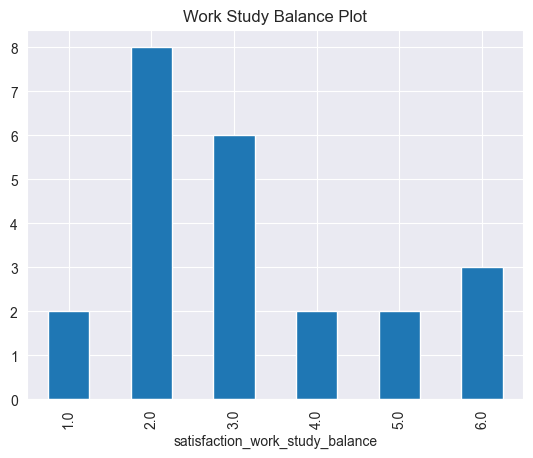

In [54]:
# reset index
wsb_value = deepcopy(df_1["satisfaction_work_study_balance"].value_counts().sort_index())
wsb_value.plot(kind="bar", title="Work Study Balance Plot")

Text(0.5, 1.0, 'Relationship of statisfaction WSB and income')

<Figure size 800x600 with 0 Axes>

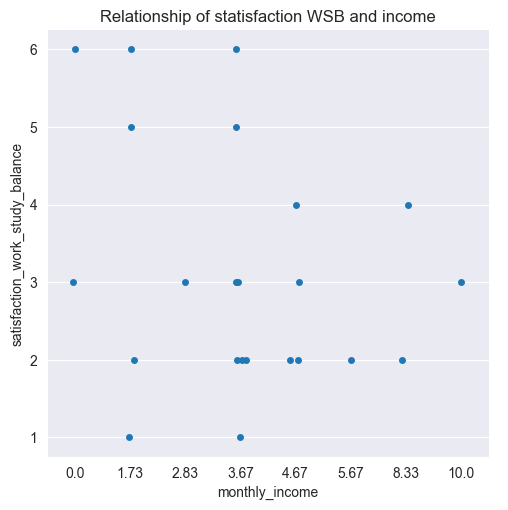

In [55]:
plt.figure(figsize=(8,6))
sns.catplot(data=df_1, x="monthly_income", y="satisfaction_work_study_balance")
plt.title("Relationship of statisfaction WSB and income")

money is not everything i guess

## Conclusion

In [56]:
drop_features = ["study_type", "study_section"]
onehot_features = ["gender_identity", "faculty","previously_studied"]
bearbeitet = ["age","work_impact_on_studies", "monthly_income", "degrees_obtained", "work_hours_weekly"]
TARGET = ["satisfaction_work_study_balance"]

## Modelling

In [57]:
df_1.head()

,age,gender_identity,study_type,faculty,study_section,degrees_obtained,previously_studied,funding_source,work_hours_weekly,monthly_income,work_impact_on_studies,satisfaction_work_study_balance
0,21,man,Dualstudy,Wirtschaftsingenieurwesen,Bachelor,4,Nein,1,20,4.67,0,4.0
2,22,woman,Fulltime,Wirtschaftsingenieurwesen,Bachelor,3,Ja,2,20,5.67,4,2.0
7,25,man,part-time,Wirtschaftsingenieurwesen,Bachelor,4,Ja,1,40,10.0,4,3.0
8,22,man,Fulltime,Wirtschaftsingenieurwesen,Bachelor,4,Nein,1,20,4.67,2,2.0
9,25,man,Fulltime,Business School,Bachelor,3,Nein,2,20,3.67,1,3.0


In [58]:
df_1 = df_1.drop(columns=drop_features)
df_1.shape

(23, 10)

In [63]:
df_1_OHE = df_1[onehot_features]
df_1_input = df_1[bearbeitet]
df_1_target = df_1[TARGET]

df_visual = pd.concat([df_1_input, df_1_target], axis= 1)
corr = df_visual.corr().round(2)

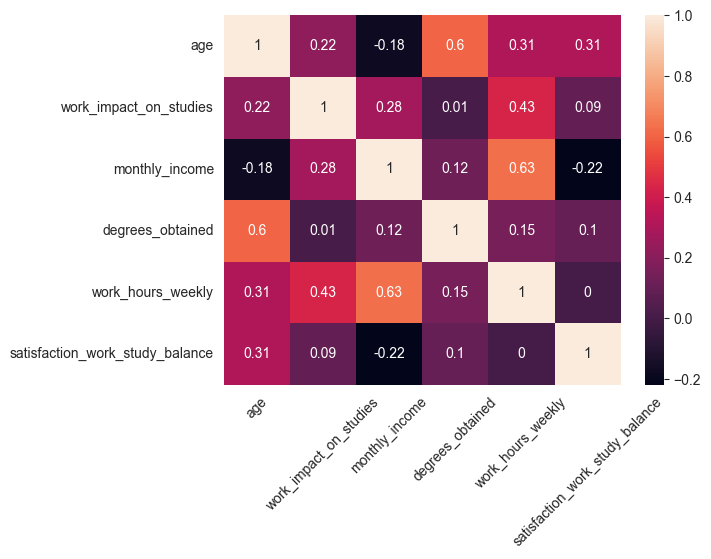

In [64]:
dataplot = sns.heatmap(corr, annot=True)
plt.xticks(rotation=45)
plt.show()

### Pre-Processing

In [65]:
### One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Create an encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df_1_OHE)

# Transform the data using the fitted encoder
encoded = encoder.transform(df_1_OHE)
encoded_data = pd.DataFrame(encoded,
                              columns=encoder.get_feature_names_out(
                                  input_features=df_1_OHE.columns),
                              index=df_1_OHE.index)

encoded_data

,gender_identity_man,gender_identity_unkown,gender_identity_woman,faculty_Business School,faculty_Elektro und Informationstechnik,faculty_Maschinenbau,faculty_Wirtschaftsingenieurwesen,previously_studied_Ja,previously_studied_Nein
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
13,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
16,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
17,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [66]:
final_df = pd.concat([df_1_input, encoded_data], axis=1)
final_df.head()

,age,work_impact_on_studies,monthly_income,degrees_obtained,work_hours_weekly,gender_identity_man,gender_identity_unkown,gender_identity_woman,faculty_Business School,faculty_Elektro und Informationstechnik,faculty_Maschinenbau,faculty_Wirtschaftsingenieurwesen,previously_studied_Ja,previously_studied_Nein
0,21,0,4.67,4,20,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,22,4,5.67,3,20,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7,25,4,10.0,4,40,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,22,2,4.67,4,20,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,25,1,3.67,3,20,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [67]:
final_df_result = pd.concat([final_df, df_1_target], axis=1)
final_df_result.head()

,age,work_impact_on_studies,monthly_income,degrees_obtained,work_hours_weekly,gender_identity_man,gender_identity_unkown,gender_identity_woman,faculty_Business School,faculty_Elektro und Informationstechnik,faculty_Maschinenbau,faculty_Wirtschaftsingenieurwesen,previously_studied_Ja,previously_studied_Nein,satisfaction_work_study_balance
0,21,0,4.67,4,20,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0
2,22,4,5.67,3,20,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
7,25,4,10.0,4,40,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
8,22,2,4.67,4,20,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
9,25,1,3.67,3,20,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0


In [68]:
corr_final = final_df_result.corr()
corr_final["satisfaction_work_study_balance"].sort_values(ascending=False)

satisfaction_work_study_balance            1.000000
gender_identity_unkown                     0.404520
age                                        0.313233
degrees_obtained                           0.104921
work_impact_on_studies                     0.091962
faculty_Business School                    0.051959
faculty_Wirtschaftsingenieurwesen          0.045455
previously_studied_Nein                    0.017650
work_hours_weekly                          0.000785
previously_studied_Ja                     -0.017650
faculty_Maschinenbau                      -0.018387
gender_identity_woman                     -0.062984
gender_identity_man                       -0.107565
faculty_Elektro und Informationstechnik   -0.159356
monthly_income                            -0.222961
Name: satisfaction_work_study_balance, dtype: float64

In [69]:
X = final_df
y = df_1_target

In [70]:
X["monthly_income"] = X["monthly_income"].astype(float)

In [71]:
X = sm.add_constant(X)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     satisfaction_work_study_balance   R-squared:                       0.319
Model:                                         OLS   Adj. R-squared:                 -0.362
Method:                              Least Squares   F-statistic:                    0.4687
Date:                             Wed, 05 Jun 2024   Prob (F-statistic):              0.888
Time:                                     10:48:46   Log-Likelihood:                -37.731
No. Observations:                               23   AIC:                             99.46
Df Residuals:                                   11   BIC:                             113.1
Df Model:                                       11                                         
Covariance Type:                         nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.4445      2.066      0.215      0.834      -4.103       4.992
age                                         0.0790      0.189      0.419      0.683      -0.336       0.494
work_impact_on_studies                      0.0716      0.317      0.226      0.825      -0.626       0.769
monthly_income                             -0.0951      0.340     -0.280      0.785      -0.842       0.652
degrees_obtained                            0.1833      0.522      0.351      0.732      -0.966       1.332
work_hours_weekly                           0.0098      0.095      0.103      0.920      -0.199       0.219
gender_identity_man                        -0.6233      0.765     -0.815      0.432      -2.307       1.060
gender_identity_unkown                      2.0517      1.842      1.114      0.289      -2.002       6.106
gender_identity_woman                      -0.9839      0.999     -0.985      0.346      -3.183       1.215
faculty_Business School                     0.8723      1.190      0.733      0.479      -1.748       3.492
faculty_Elektro und Informationstechnik    -1.0302      2.338     -0.441      0.668      -6.175       4.115
faculty_Maschinenbau                        0.2452      1.641      0.149      0.884      -3.368       3.858
faculty_Wirtschaftsingenieurwesen           0.3572      0.864      0.414      0.687      -1.544       2.258
previously_studied_Ja                       0.1360      1.232      0.110      0.914      -2.576       2.848
previously_studied_Nein                     0.3085      1.015      0.304      0.767      -1.926       2.543
==============================================================================
Omnibus:                        1.320   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                0.941
Skew:                           0.483   Prob(JB):                        0.625
Kurtosis:                       2.780   Cond. No.                     4.83e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""